<a href="https://colab.research.google.com/github/sagdicberk/ImageProcessing-GAZI-MASTER/blob/main/GorIsle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gorüntü İşleme Ödevler 1.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


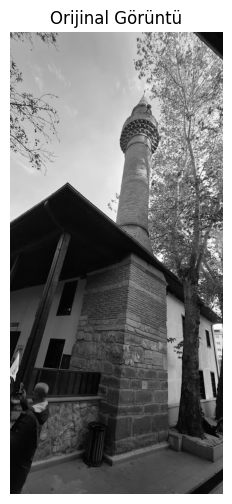

In [ ]:
# Görüntüyü gri seviyede yükle
img = cv2.imread('/content/odev1samplePhoto2.jpg', cv2.IMREAD_GRAYSCALE)

# Kontrol için göster
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Orijinal Görüntü")
plt.axis('off')
plt.show()


In [ ]:
def plot_histogram(image, title="Histogram"):
    plt.figure(figsize=(6,4))
    plt.hist(image.ravel(), bins=256, range=[0,256], color='gray')
    plt.title(title)
    plt.xlabel("Piksel Değeri")
    plt.ylabel("Frekans")
    plt.show()


Histogram Eşitleme

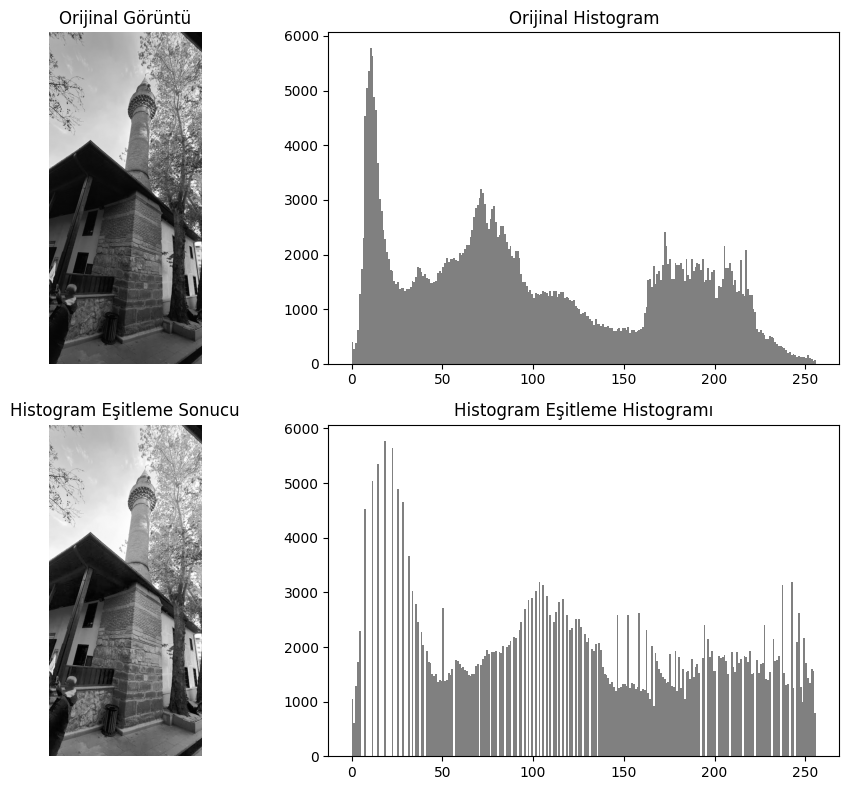

In [ ]:
# Histogram Eşitleme tablosu

hist_eq = cv2.equalizeHist(img)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. satır - ORİJİNAL
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title("Orijinal Görüntü")
axes[0,0].axis('off')

axes[0,1].hist(img.ravel(), bins=256, range=[0,256], color='gray')
axes[0,1].set_title("Orijinal Histogram")

# 2. satır - HISTOGRAM EŞİTLEME
axes[1,0].imshow(hist_eq, cmap='gray')
axes[1,0].set_title("Histogram Eşitleme Sonucu")
axes[1,0].axis('off')

axes[1,1].hist(hist_eq.ravel(), bins=256, range=[0,256], color='gray')
axes[1,1].set_title("Histogram Eşitleme Histogramı")

plt.tight_layout()
plt.show()


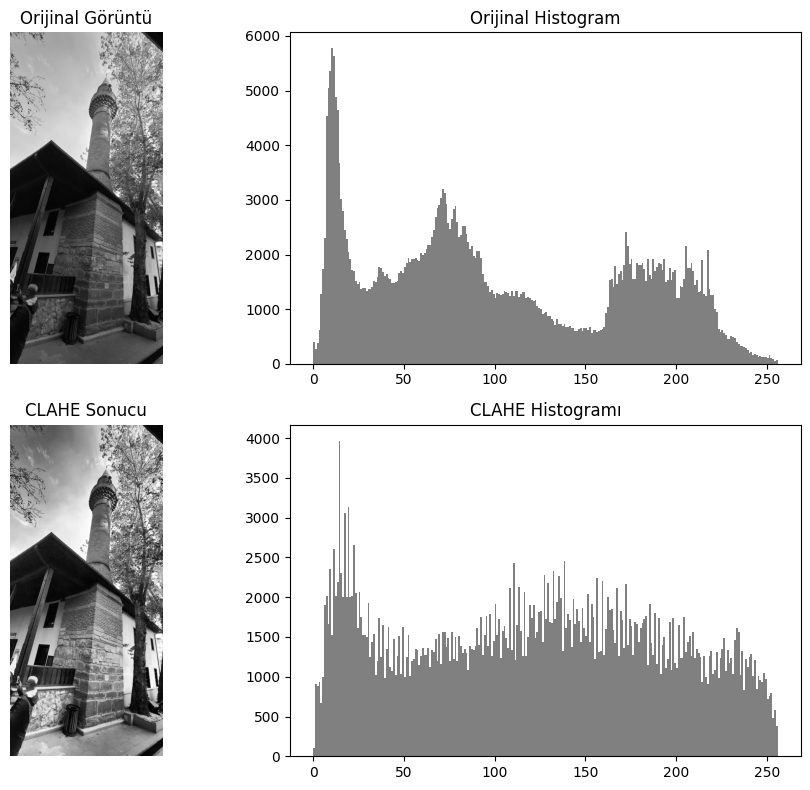

In [ ]:
# CLAHE tablosu

clahe = cv2.createCLAHE(clipLimit=2.6, tileGridSize=(2,2))
clahe_img = clahe.apply(img)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. satır - ORİJİNAL
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title("Orijinal Görüntü")
axes[0,0].axis('off')

axes[0,1].hist(img.ravel(), bins=256, range=[0,256], color='gray')
axes[0,1].set_title("Orijinal Histogram")

# 2. satır - CLAHE SONUCU
axes[1,0].imshow(clahe_img, cmap='gray')
axes[1,0].set_title("CLAHE Sonucu")
axes[1,0].axis('off')

axes[1,1].hist(clahe_img.ravel(), bins=256, range=[0,256], color='gray')
axes[1,1].set_title("CLAHE Histogramı")

plt.tight_layout()
plt.show()


Min: 0 Max: 255


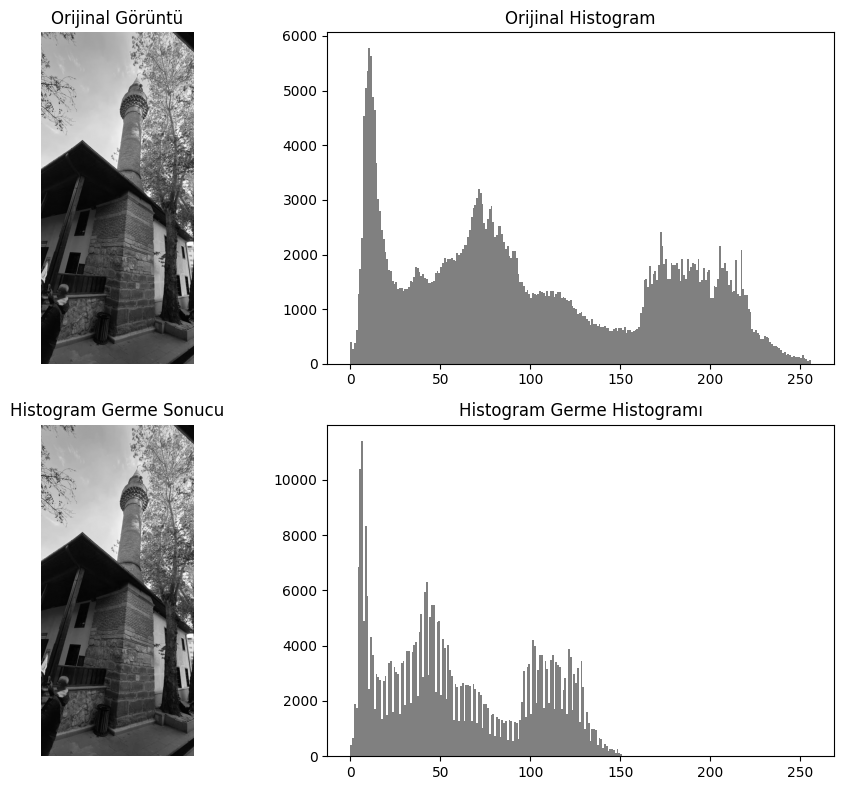

In [ ]:
# Histogram Germe (Normalization) tablosu

hist_stretch = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. satır - ORİJİNAL
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title("Orijinal Görüntü")
axes[0,0].axis('off')

axes[0,1].hist(img.ravel(), bins=256, range=[0,256], color='gray')
axes[0,1].set_title("Orijinal Histogram")

# 2. satır - GERİLMİŞ HAL
axes[1,0].imshow(hist_stretch, cmap='gray')
axes[1,0].set_title("Histogram Germe Sonucu")
axes[1,0].axis('off')

axes[1,1].hist(hist_stretch.ravel(), bins=256, range=[0,256], color='gray')
axes[1,1].set_title("Histogram Germe Histogramı")
print("Min:", img.min(), "Max:", img.max())

plt.tight_layout()
plt.show()


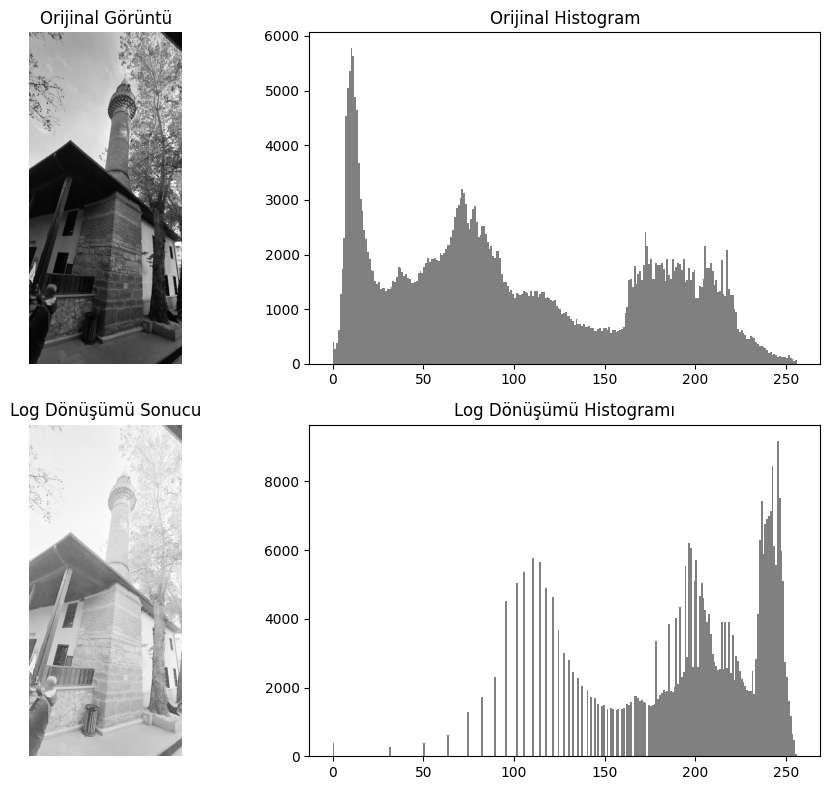

In [ ]:
# Logaritmik Dönüşüm (daha güvenli)
img_float = img.astype(np.float32)
max_val = np.max(img_float)

if max_val == 0:
    log_img = img_float  # Görüntü tamamen siyahsa değişiklik yok
else:
    c = 255 / np.log1p(max_val)  # np.log1p(max_val) = log(1 + x)
    log_img = (c * np.log1p(img_float)).astype(np.uint8)

# TABLO şeklinde gösterim
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. satır - ORİJİNAL
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title("Orijinal Görüntü")
axes[0,0].axis('off')

axes[0,1].hist(img.ravel(), bins=256, range=[0,256], color='gray')
axes[0,1].set_title("Orijinal Histogram")

# 2. satır - LOG DÖNÜŞÜM
axes[1,0].imshow(log_img, cmap='gray')
axes[1,0].set_title("Log Dönüşümü Sonucu")
axes[1,0].axis('off')

axes[1,1].hist(log_img.ravel(), bins=256, range=[0,256], color='gray')
axes[1,1].set_title("Log Dönüşümü Histogramı")

plt.tight_layout()
plt.show()


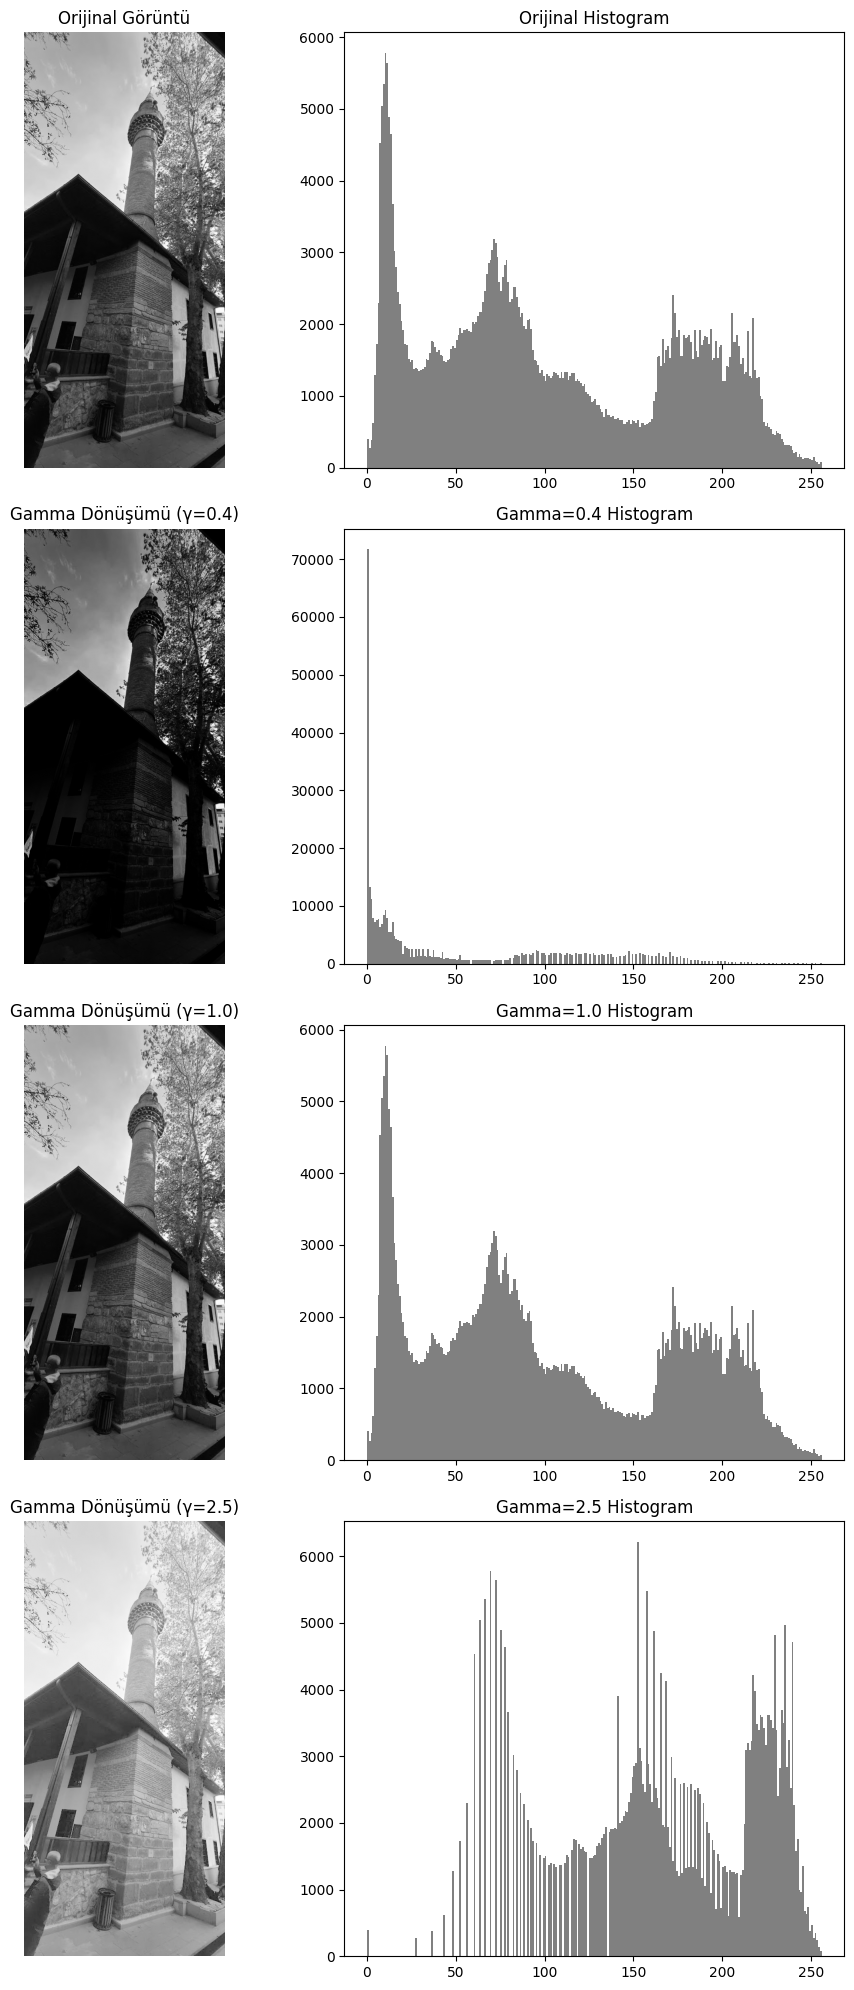

In [ ]:
def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma_values = [0.4, 1.0, 2.5]

# Toplam satır sayısı = 1 (orijinal) + len(gamma_values)
fig, axes = plt.subplots(len(gamma_values)+1, 2, figsize=(10, 5*(len(gamma_values)+1)))

# İlk satır: Orijinal
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title("Orijinal Görüntü")
axes[0,0].axis('off')

axes[0,1].hist(img.ravel(), bins=256, range=[0,256], color='gray')
axes[0,1].set_title("Orijinal Histogram")

# Gamma dönüşümleri
for i, g in enumerate(gamma_values):
    gamma_img = gamma_correction(img, g)

    axes[i+1,0].imshow(gamma_img, cmap='gray')
    axes[i+1,0].set_title(f"Gamma Dönüşümü (γ={g})")
    axes[i+1,0].axis('off')

    axes[i+1,1].hist(gamma_img.ravel(), bins=256, range=[0,256], color='gray')
    axes[i+1,1].set_title(f"Gamma={g} Histogram")

plt.tight_layout()
plt.show()
